### Assignment 4

First import the basic libraries for image processing. 

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import inv

Instantiate the data. 

In [3]:
data = loadmat('69dataset.mat')
labels = data['labels']
X = data['X']
Y = data['Y']
X_prior = data['prior']
pixel_mean = np.zeros((1,784))
num_images = X.shape[0]
voxel_mean = np.zeros((1,3092))
for i in range(num_images):
    pixel_mean += X[i,:]/num_images
    voxel_mean += Y[i,:]/num_images
X_norm = (X - pixel_mean) / np.std(X)
Y_norm = (Y - voxel_mean) / np.std(Y)
X_train, X_test = np.concatenate((X_norm[10:50,:], X_norm[50:90,:])), np.concatenate((X_norm[0:10,:], X_norm[90:-1,:]))
Y_train, Y_test = np.concatenate((Y_norm[10:50,:], Y_norm[50:90,:])), np.concatenate((Y_norm[0:10,:], Y_norm[90:-1,:]))

#### Exercise 1

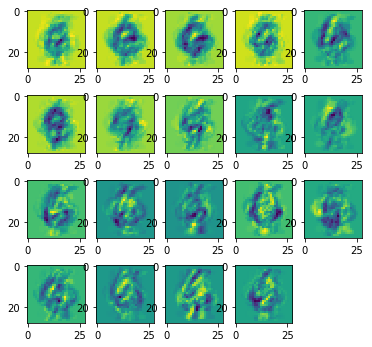

In [4]:
I_l = np.mat(10**-6 * np.identity(3092))
B = inv(np.mat(Y_train).T * np.mat(Y_train) + I_l)\
    * np.mat(Y_train).T * np.mat(X_train)

x_test = B.T * Y_test.T
fig = plt.figure(figsize=(6,6))
# reconstructed images
for i in range(19):
    image = np.reshape(x_test.T[i,:],(28,28)).T
    sub = fig.add_subplot(4,5,i+1)
    sub.imshow(image)

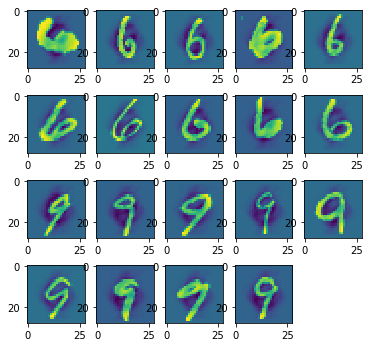

In [5]:
# TODO: invert normalisation
# acutal images
fig = plt.figure(figsize=(6,6))
for i in range(19):
    image = np.reshape(X_test[i,:],(28,28)).T
    sub = fig.add_subplot(4,5,i+1)
    sub.imshow(image)

#### Exercise 2

In [6]:
sigma_I = np.mat(10**-3 * np.identity(784)) #covariance matrix
I_l = np.mat(10**-6 * np.identity(784))

B = inv(np.mat(X_train).T * np.mat(X_train) + I_l)\
    * np.mat(X_train).T * np.mat(Y_train)

In [7]:
diagonal_addup = np.zeros((784, 784))
np.fill_diagonal(diagonal_addup, 10**-6)

sigma_prior = np.mat(diagonal_addup + np.mat(X_prior).T * np.mat(X_prior) / (np.shape(X_prior)[0] - 1))

Visualisation of sigma prior

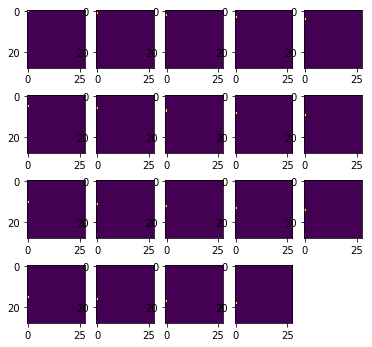

In [24]:
fig = plt.figure(figsize=(6,6))
for i in range(19):
    image = np.reshape(sigma_prior[i,:], (28,28)).T
    sub = fig.add_subplot(4,5,i+1)
    sub.imshow(image)

In [30]:
np.shape(B)

(784, 3092)

In [40]:
upost = (sigma_prior.I + B * sigma_I.I * B.T).I * B * sigma_I.I * np.mat(Y_train) 

ValueError: shapes (784,3092) and (784,784) not aligned: 3092 (dim 1) != 784 (dim 0)